# Notebook to analyze whether the assumption enhancer -> promoter == promoter -> enhancer

In [9]:
import polars as pl
import seaborn as sns
import polars.selectors as cs
import matplotlib.pyplot as plt
import os

In [14]:
bins_ignoring_order = pl.read_csv("../../results/MPRA_analysis/CMPRA5/labeled_data_singlebinssmalleroverlap.tsv", separator="\t")
bins_with_order = pl.read_csv("../../results/MPRA_analysis/CMPRA5/labeled_data_testbinorientations.tsv", separator="\t")

In [15]:
print(bins_ignoring_order.height, bins_with_order.height)

143857 146884


In [38]:
bins_with_order.unique(["promoter", "OE"]).height

87639

In [24]:
both_orders = bins_with_order.filter((pl.col("left_bin").len().over(["promoter", "OE"]) > 1) & (pl.col("promoter").is_not_null())).sort("promoter", "OE")

In [28]:
prom_right = both_orders.filter(pl.col("targeted_left") == "unlabeled").select("promoter", "OE", "adj.P.Val", "logFC", "z_score")
prom_left = both_orders.filter(pl.col("targeted_right") == "unlabeled").select("promoter", "OE", "adj.P.Val", "logFC", "z_score")
both_orders_wide = prom_left.join(prom_right, on=["promoter", "OE"])

In [34]:
prom_left.mean()

promoter,OE,adj.P.Val,logFC,z_score
str,str,f64,f64,f64
null,null,0.112539,-0.245068,-0.093854


In [35]:
prom_right.mean()

promoter,OE,adj.P.Val,logFC,z_score
str,str,f64,f64,f64
null,null,0.110076,-0.226487,-0.068508


In [31]:
both_orders_wide.select(pl.corr("logFC", "logFC_right"), pl.corr("z_score", "z_score_right"))

logFC,z_score
f64,f64
0.718521,0.2775


<Axes: xlabel='logFC', ylabel='logFC_right'>

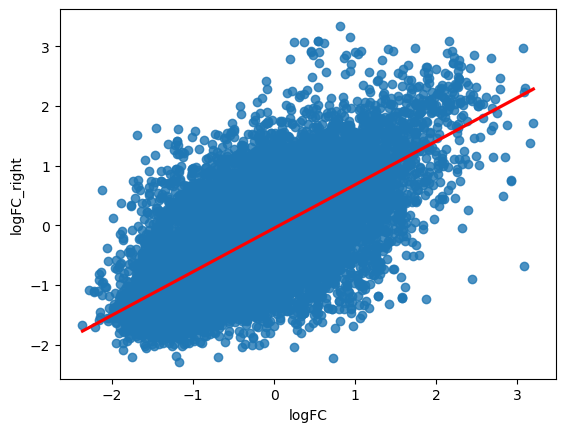

In [33]:
sns.regplot(data=both_orders_wide.to_pandas(), x="logFC", y="logFC_right", line_kws={"color": "red"})